# Step 1: Set Up Your Environment


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
from google.colab import drive

# Step 2: Load the Dataset

In [ ]:
def load_images_and_annotations(image_dir, annotation_dir, img_size=(128, 128)):
  images = []
  annotations = []
  for filename in os.listdir(image_dir):
    if filename.endswith('.png'):
      img_path = os.path.join(image_dir, filename)
      annotation_path = os.path.join(annotation_dir, filename) # Assuming same filename for annotations

      # Load and resize images
      img = load_img(img_path, target_size=img_size)
      img = img_to_array(img) / 255.0 # Normalize to [0,1]
      images.append(img)

      # Load and resize annotations
      annotation = load_img(annotation_path, target_size=img_size)
      annotation = img_to_array(annotation) / 255.0 # Normalize to [0,1]
      annotations.append(annotation)

  return np.array(images), np.array(annotations)

# Load your dataset
image_dir = '/content/drive/MyDrive/Data/Common_Carotid_Artery_Ultrasound_Images/US_images' # Replace with your image directory
annotation_dir = '/content/drive/MyDrive/Data/Common_Carotid_Artery_Ultrasound_Images/Expert_mask_images' # Replace with your annotation directory
X_train, y_train = load_images_and_annotations(image_dir, annotation_dir)


# Step 3: Define the CNN Model (U-Net for segmentation)

In [ ]:
def unet_model(input_size=(128, 128, 3)):
  inputs = layers.Input(input_size)

  # Encoder
  c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
  c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
  p1 = layers.MaxPooling2D((2, 2))(c1)

  c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
  c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
  p2 = layers.MaxPooling2D((2, 2))(c2)

  c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
  c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c3)
  p3 = layers.MaxPooling2D((2, 2))(c3)

  # Bottleneck
  c4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p3)
  c4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c4)

  # Decoder
  u5 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c4)
  u5 = layers.concatenate([u5, c3])
  c5 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u5)
  c5 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c5)

  u6 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c5)
  u6 = layers.concatenate([u6, c2])
  c6 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u6)
  c6 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c6)

  u7 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c6)
  u7 = layers.concatenate([u7, c1])
  c7 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u7)
  c7 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c7)

  outputs = layers.Conv2D(3, (1, 1), activation='sigmoid')(c7) # Output layer for segmentation
  model = models.Model(inputs=[inputs], outputs=[outputs])
  return model

# Create the model
model = unet_model()

# Step 4: Compile the Model

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train the Model

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_split=0.2)
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array

Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 359s 6s/step - accuracy: 0.5548 - loss: 0.3129 - val_accuracy: 0.2194 - val_loss: 0.0826
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 381s 6s/step - accuracy: 0.2342 - loss: 0.0681 - val_accuracy: 0.2822 - val_loss: 0.0342
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 382s 6s/step - accuracy: 0.2151 - loss: 0.0347 - val_accuracy: 0.2690 - val_loss: 0.0142
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 384s 6s/step - accuracy: 0.3247 - loss: 0.0136 - val_accuracy: 0.2868 - val_loss: 0.0110
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 379s 6s/step - accuracy: 0.3454 - loss: 0.0084 - val_accuracy: 0.4003 - val_loss: 0.0124
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 366s 7s/step - accuracy: 0.3657 - loss: 0.0096 - val_accuracy: 0.4463 - val_loss: 0.0101
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 380s 7s/step - accuracy: 0.4031 - loss: 0.0067 - val_accuracy: 0.3927 - val_loss: 0.0094
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 362s 6s/step - accuracy: 0.3707 - loss: 0.0056 - val_accuracy: 0.4232 - v

# Step 6: Load and Preprocess New Images for Prediction

In [ ]:
def load_and_preprocess_image(img_path, img_size=(128, 128)):
  img = load_img(img_path, target_size=img_size)
  img = img_to_array(img) / 255.0 # Normalize to [0,1]
  return np.expand_dims(img, axis=0) # Add batch dimension

# Predicting on a new image
new_image_path = '/content/drive/MyDrive/Data/Common_Carotid_Artery_Ultrasound_Images/US_images/202201121748100022VAS_slice_1069.png' # Replace with your image path
new_image = load_and_preprocess_image(new_image_path)

# Step 7: Make Predictions

In [ ]:
predicted_mask = model.predict(new_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


# Step 8: Post-process the Output

In [ ]:
predicted_mask = np.squeeze(predicted_mask) # Remove batch dimension
predicted_mask = (predicted_mask * 255).astype(np.uint8) # Convert to 0-255 range

# Ensure the predicted_mask is binary (0 or 255)
_, binary_mask = cv2.threshold(predicted_mask, 127, 255, cv2.THRESH_BINARY)

# Step 9: Find the Boundary of the Predicted Mask

In [ ]:
def find_mask_boundary(mask):
  # Convert mask to binary (0 or 255) if not already done
  if mask.ndim == 3: # If mask is 3D (e.g., RGB)
    mask = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY) # Convert to grayscale
  _, binary_mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

  # Find contours
  contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

  # Create an empty image for the boundary
  boundary_image = np.zeros_like(mask)

  # Draw contours on the boundary image
  cv2.drawContours(boundary_image, contours, -1, (255, 255, 255), thickness=2) # White boundary
  return boundary_image

# Get the mask boundary
mask_boundary = find_mask_boundary(predicted_mask)

# Step 10: Measure the Mask Boundary

In [ ]:
def measure_boundary_length(boundary_image):
  # Count the number of white pixels in the boundary image
  boundary_length = np.sum(boundary_image > 0)
  return boundary_length

# Measure the length of the mask boundary
boundary_length = measure_boundary_length(mask_boundary)
print(f"Length of the mask boundary: {boundary_length} pixels")

Length of the mask boundary: 219 pixels


# Step 11: Overlay the Mask and Boundary on the Original Image

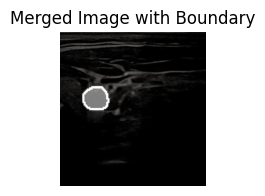

In [ ]:
def overlay_mask_and_boundary(original_image_path, predicted_mask, mask_boundary,alpha=0.5):
  # Load and convert the original image to a NumPy array
  original_image = img_to_array(load_img(original_image_path)) / 255.0 # Normalize to [0, 1]

  # Resize predicted mask and mask boundary to match original image size
  original_height, original_width, _ = original_image.shape
  predicted_mask_resized = cv2.resize(predicted_mask, (original_width, original_height))
  mask_boundary_resized = cv2.resize(mask_boundary, (original_width, original_height))

  # Normalize the resized predicted mask and boundary
  predicted_mask_resized = (predicted_mask_resized / 255.0) # Normalize to [0, 1]
  mask_boundary_resized = (mask_boundary_resized / 255.0) # Normalize to [0, 1]

  # Check the number of channels and convert if necessary
  if len(predicted_mask_resized.shape) == 2: # Single-channel (grayscale)
    predicted_mask_rgb = cv2.cvtColor(predicted_mask_resized.astype(np.uint8),cv2.COLOR_GRAY2RGB)
  else:
    predicted_mask_rgb = predicted_mask_resized # Already RGB

  if len(mask_boundary_resized.shape) == 2: # Single-channel (grayscale)
    mask_boundary_rgb = cv2.cvtColor(mask_boundary_resized.astype(np.uint8),cv2.COLOR_GRAY2RGB)
  else:
    mask_boundary_rgb = mask_boundary_resized # Already RGB

  # Create an overlay by blending the original image, predicted mask, and mask boundary
  overlay = original_image * (1 - alpha) + predicted_mask_rgb * alpha + mask_boundary_rgb * 0.7

  # Adjust alpha for boundary
  return overlay

# Merged Image with Boundary
merged_image_with_boundary = overlay_mask_and_boundary(new_image_path, predicted_mask,mask_boundary)
plt.subplot(1, 3, 3)
plt.title("Merged Image with Boundary")
plt.imshow(merged_image_with_boundary)
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array

# Step 6: Load and Preprocess New Images for Prediction

In [ ]:
def load_and_preprocess_image(img_path, img_size=(128, 128)):
  img = load_img(img_path, target_size=img_size)
  img = img_to_array(img) / 255.0 # Normalize to [0,1]
  return np.expand_dims(img, axis=0) # Add batch dimension

# Predicting on a new image
new_image_path = '/content/drive/MyDrive/Data/Common_Carotid_Artery_Ultrasound_Images/US_images/202201121748100022VAS_slice_1069.png' # Replace with your image path
new_image = load_and_preprocess_image(new_image_path)

# Step 7: Make Predictions

In [ ]:
predicted_mask = model.predict(new_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


# Step 8: Post-process the Output

In [ ]:
predicted_mask = np.squeeze(predicted_mask) # Remove batch dimension
predicted_mask = (predicted_mask * 255).astype(np.uint8) # Convert to 0-255 range

# Ensure the predicted_mask is binary (0 or 255)
_, binary_mask = cv2.threshold(predicted_mask, 127, 255, cv2.THRESH_BINARY)

# Step 9: Find the Boundary of the Predicted Mask

In [ ]:
def find_mask_boundary(mask):
  # Convert mask to binary (0 or 255) if not already done
  if mask.ndim == 3: # If mask is 3D (e.g., RGB)
    mask = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY) # Convert to grayscale
  _, binary_mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)

  # Find contours
  contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

  # Create an empty image for the boundary
  boundary_image = np.zeros_like(mask)

  # Draw contours on the boundary image
  cv2.drawContours(boundary_image, contours, -1, (255, 255, 255), thickness=2) # White boundary
  return boundary_image

# Get the mask boundary
mask_boundary = find_mask_boundary(predicted_mask)

# Step 10: Measure the Mask Boundary

In [ ]:
def measure_boundary_length(boundary_image):
  # Count the number of white pixels in the boundary image
  boundary_length = np.sum(boundary_image > 0)
  return boundary_length

# Measure the length of the mask boundary
boundary_length = measure_boundary_length(mask_boundary)
print(f"Length of the mask boundary: {boundary_length} pixels")

Length of the mask boundary: 219 pixels


# Step 11: Overlay the Mask and Boundary on the Original Image

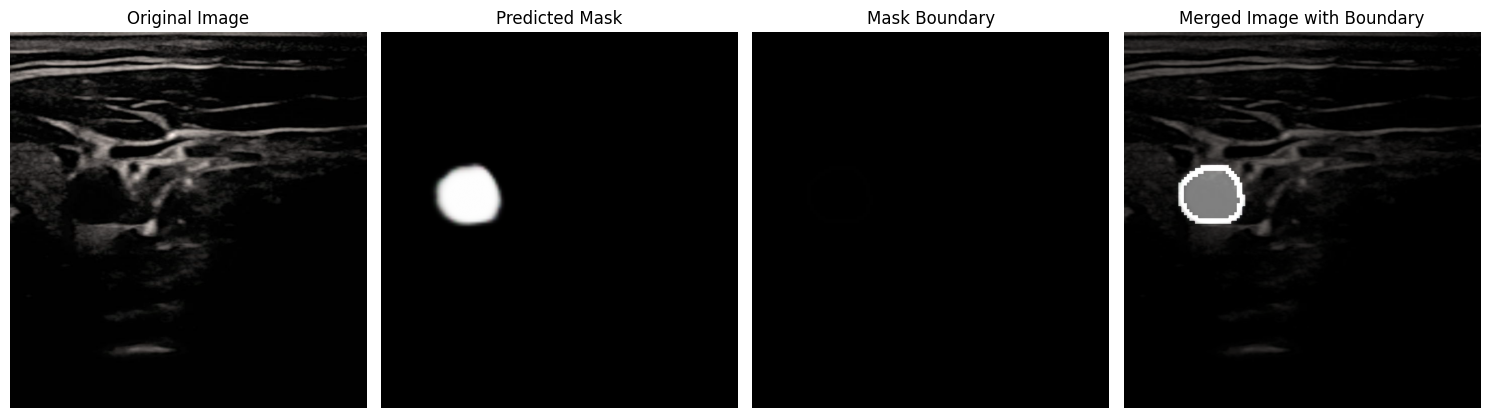

In [ ]:
def overlay_mask_and_boundary(original_image_path, predicted_mask, mask_boundary,alpha=0.5):
  # Load and convert the original image to a NumPy array
  original_image = img_to_array(load_img(original_image_path)) / 255.0 # Normalize to [0, 1]

  # Resize predicted mask and mask boundary to match original image size
  original_height, original_width, _ = original_image.shape
  predicted_mask_resized = cv2.resize(predicted_mask, (original_width, original_height))
  mask_boundary_resized = cv2.resize(mask_boundary, (original_width, original_height))

  # Normalize the resized predicted mask and boundary
  predicted_mask_resized = (predicted_mask_resized / 255.0) # Normalize to [0, 1]
  mask_boundary_resized = (mask_boundary_resized / 255.0) # Normalize to [0, 1]

  # Check the number of channels and convert if necessary
  if len(predicted_mask_resized.shape) == 2: # Single-channel (grayscale)
    predicted_mask_rgb = cv2.cvtColor(predicted_mask_resized.astype(np.uint8),cv2.COLOR_GRAY2RGB)
  else:
    predicted_mask_rgb = predicted_mask_resized # Already RGB

  if len(mask_boundary_resized.shape) == 2: # Single-channel (grayscale)
    mask_boundary_rgb = cv2.cvtColor(mask_boundary_resized.astype(np.uint8),cv2.COLOR_GRAY2RGB)
  else:
    mask_boundary_rgb = mask_boundary_resized # Already RGB

  # Create an overlay by blending the original image, predicted mask, and mask boundary
  overlay = original_image * (1 - alpha) + predicted_mask_rgb * alpha + mask_boundary_rgb * 0.7

  # Adjust alpha for boundary
  return overlay, original_image, predicted_mask_rgb, mask_boundary_rgb

# Merged Image with Boundary
merged_image_with_boundary, original_image, predicted_mask_rgb, mask_boundary_rgb = overlay_mask_and_boundary(new_image_path, predicted_mask, mask_boundary)

# Display all images
plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(original_image)
plt.axis('off')

# Predicted Mask
plt.subplot(1, 4, 2)
plt.title("Predicted Mask")
plt.imshow(predicted_mask_rgb)
plt.axis('off')

# Mask Boundary
plt.subplot(1, 4, 3)
plt.title("Mask Boundary")
plt.imshow(mask_boundary_rgb)
plt.axis('off')

# Merged Image with Boundary
plt.subplot(1, 4, 4)
plt.title("Merged Image with Boundary")
plt.imshow(merged_image_with_boundary)
plt.axis('off')
plt.tight_layout()
plt.show()

#Saving The Model

In [ ]:
model.save('carotid_artery_model.h5')

#Try 1


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 675ms/step


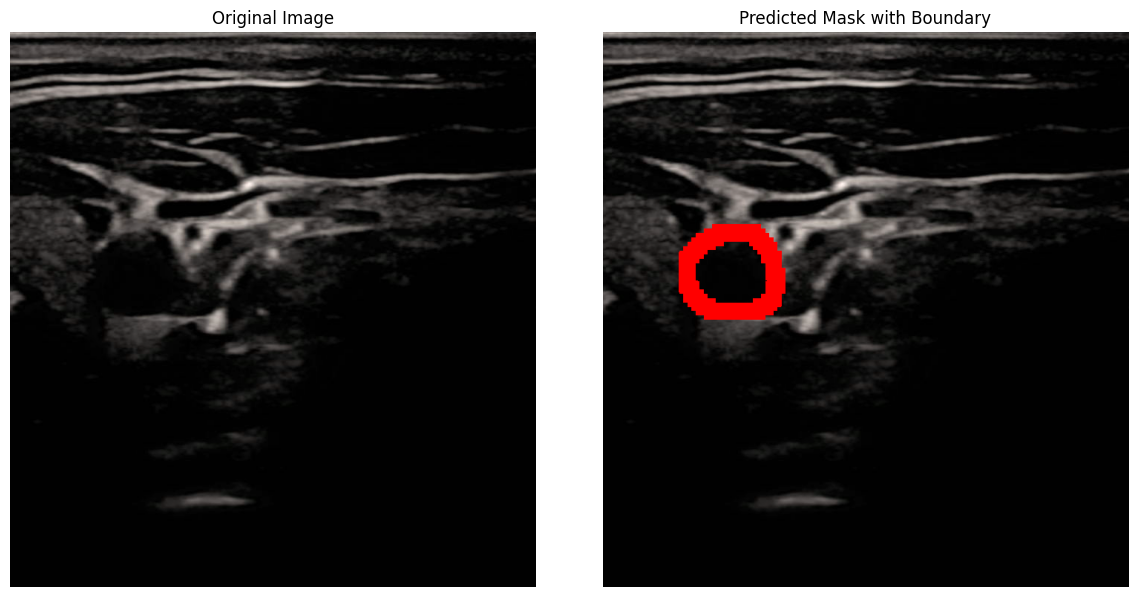

In [22]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

# Step 1: Load your pre-trained model
model_path = '/content/carotid_artery_model.h5'  # Replace with your actual model path
model = load_model(model_path)

# Step 2: Load and Preprocess New Images for Prediction
def load_and_preprocess_image(img_path, img_size=(128, 128)):
    img = load_img(img_path, target_size=img_size)
    img = img_to_array(img) / 255.0  # Normalize to [0,1]
    return np.expand_dims(img, axis=0)  # Add batch dimension

# Step 3: Predicting on a New Image
new_image_path = '/content/drive/MyDrive/Data/Common_Carotid_Artery_Ultrasound_Images/US_images/202201121748100022VAS_slice_1069.png'  # Replace with your image path
new_image = load_and_preprocess_image(new_image_path)

# Step 4: Make Predictions
predicted_mask = model.predict(new_image)

# Step 5: Post-process the Output
predicted_mask = np.squeeze(predicted_mask)  # Remove batch dimension
predicted_mask = (predicted_mask * 255).astype(np.uint8)  # Convert to 0-255 range

# Ensure the predicted_mask is binary (0 or 255)
_, binary_mask = cv2.threshold(predicted_mask, 127, 255, cv2.THRESH_BINARY)

# Step 6: Find the Boundary of the Predicted Mask
def find_mask_boundary(mask):
    if mask.ndim == 3:  # If mask is 3D (e.g., RGB)
        mask = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
    _, binary_mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
    # Find contours
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Create an empty image for the boundary
    boundary_image = np.zeros_like(mask)
    # Draw contours on the boundary image in red
    cv2.drawContours(boundary_image, contours, -1, (255, 0, 0), thickness=2)  # Red boundary (BGR format)
    return boundary_image

# Get the mask boundary
mask_boundary = find_mask_boundary(predicted_mask)

# Step 7: Overlay the Mask and Boundary on the Original Image
def overlay_mask_and_boundary(original_image_path, predicted_mask, mask_boundary):
    # Load and convert the original image to a NumPy array
    original_image = img_to_array(load_img(original_image_path)) / 255.0  # Normalize to [0, 1]
    # Resize predicted mask and mask boundary to match original image size
    original_height, original_width, _ = original_image.shape
    predicted_mask_resized = cv2.resize(predicted_mask, (original_width, original_height))
    mask_boundary_resized = cv2.resize(mask_boundary, (original_width, original_height))
    # Create an overlay by blending the original image and mask boundary
    overlay = original_image.copy()
    overlay[mask_boundary_resized > 0] = [1, 0, 0]  # Set boundary pixels to red
    return overlay, original_image

# Create the overlay
overlay_image, original_image = overlay_mask_and_boundary(new_image_path, predicted_mask, mask_boundary)

# Step 8: Display the Images
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original_image)
plt.axis('off')

# Predicted Mask with Boundary
plt.subplot(1, 2, 2)
plt.title("Predicted Mask with Boundary")
plt.imshow(overlay_image)
plt.axis('off')

plt.tight_layout()
plt.show()


#Try 2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
Length of the mask boundary: 219 pixels
Length of the mask boundary: 21.90 mm


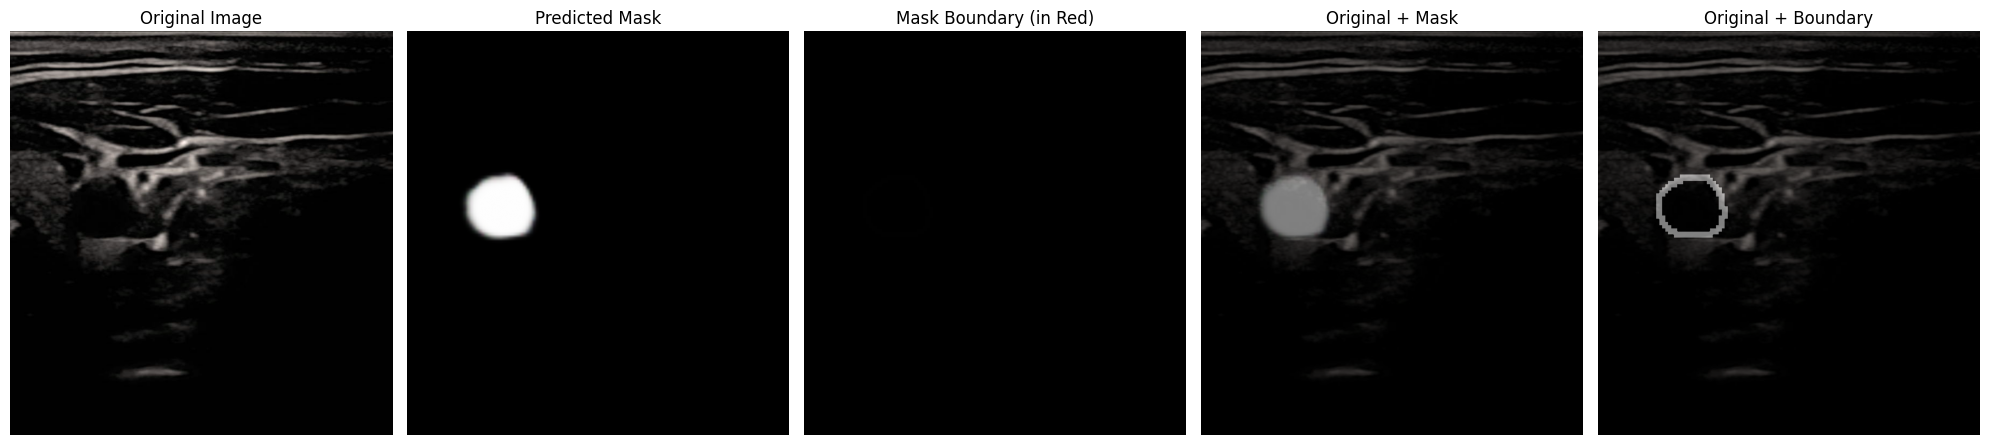

In [23]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

# Load your pre-trained model
model_path = '/content/carotid_artery_model.h5'  # Model path
model = load_model(model_path)

# Load and Preprocess New Images for Prediction
def load_and_preprocess_image(img_path, img_size=(128, 128)):
    img = load_img(img_path, target_size=img_size)
    img = img_to_array(img) / 255.0  # Normalize to [0,1]
    return np.expand_dims(img, axis=0)  # Add batch dimension

# Predicting on a new image
new_image_path = '/content/drive/MyDrive/Data/Common_Carotid_Artery_Ultrasound_Images/US_images/202201121748100022VAS_slice_1069.png'  # Image path
new_image = load_and_preprocess_image(new_image_path)

# Make Predictions
predicted_mask = model.predict(new_image)

# Post-process the Output
predicted_mask = np.squeeze(predicted_mask)  # Remove batch dimension
predicted_mask = (predicted_mask * 255).astype(np.uint8)  # Convert to 0-255 range

# Ensure the predicted_mask is binary (0 or 255)
_, binary_mask = cv2.threshold(predicted_mask, 127, 255, cv2.THRESH_BINARY)

# Find the Boundary of the Predicted Mask
def find_mask_boundary(mask):
    if mask.ndim == 3:  # If mask is 3D (e.g., RGB)
        mask = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
    _, binary_mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
    # Find contours
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Create an empty image for the boundary
    boundary_image = np.zeros_like(mask)
    # Draw contours on the boundary image in red
    cv2.drawContours(boundary_image, contours, -1, (255, 0, 0), thickness=2)  # Red boundary (BGR format)
    return boundary_image

# Get the mask boundary
mask_boundary = find_mask_boundary(predicted_mask)

# Measure the Mask Boundary
def measure_boundary_length(boundary_image, pixel_to_mm_ratio):
    # Count the number of white pixels in the boundary image
    boundary_length_pixels = np.sum(boundary_image > 0)
    boundary_length_mm = boundary_length_pixels * pixel_to_mm_ratio  # Convert to mm
    return boundary_length_pixels, boundary_length_mm

# Define the pixel to mm ratio (example: 1 pixel = 0.1 mm)
pixel_to_mm_ratio = 0.1  # Adjust this based on your image scale
boundary_length_pixels, boundary_length_mm = measure_boundary_length(mask_boundary, pixel_to_mm_ratio)
print(f"Length of the mask boundary: {boundary_length_pixels} pixels")
print(f"Length of the mask boundary: {boundary_length_mm:.2f} mm")

# Overlay the Mask and Boundary on the Original Image
def overlay_mask_and_boundary(original_image_path, predicted_mask, mask_boundary, alpha=0.5):
    # Load and convert the original image to a NumPy array
    original_image = img_to_array(load_img(original_image_path)) / 255.0  # Normalize to [0, 1]
    # Resize predicted mask and mask boundary to match original image size
    original_height, original_width, _ = original_image.shape
    predicted_mask_resized = cv2.resize(predicted_mask, (original_width, original_height))
    mask_boundary_resized = cv2.resize(mask_boundary, (original_width, original_height))
    # Normalize the resized predicted mask and boundary
    predicted_mask_resized = (predicted_mask_resized / 255.0)  # Normalize to [0, 1]
    mask_boundary_resized = (mask_boundary_resized / 255.0)  # Normalize to [0, 1]
    # Check the number of channels and convert if necessary
    if len(predicted_mask_resized.shape) == 2:  # Single-channel (grayscale)
        predicted_mask_rgb = cv2.cvtColor(predicted_mask_resized.astype(np.uint8), cv2.COLOR_GRAY2RGB)
    else:
        predicted_mask_rgb = predicted_mask_resized  # Already RGB
    if len(mask_boundary_resized.shape) == 2:  # Single-channel (grayscale)
        mask_boundary_rgb = cv2.cvtColor(mask_boundary_resized.astype(np.uint8), cv2.COLOR_GRAY2RGB)
    else:
        mask_boundary_rgb = mask_boundary_resized  # Already RGB
    # Create an overlay by blending the original image, predicted mask, and mask boundary
    overlay_mask = original_image * (1 - alpha) + predicted_mask_rgb * alpha
    overlay_boundary = original_image * (1 - alpha) + mask_boundary_rgb * alpha
    return overlay_mask, overlay_boundary, original_image, predicted_mask_rgb, mask_boundary_rgb

# Create the overlays
overlay_mask_image, overlay_boundary_image, original_image, predicted_mask_rgb, mask_boundary_rgb = overlay_mask_and_boundary(new_image_path, predicted_mask, mask_boundary)

# Display all images
plt.figure(figsize=(20, 10))

# Original Image
plt.subplot(1, 5, 1)
plt.title("Original Image")
plt.imshow(original_image)
plt.axis('off')

# Predicted Mask
plt.subplot(1, 5, 2)
plt.title("Predicted Mask")
plt.imshow(predicted_mask_rgb)
plt.axis('off')

# Mask Boundary
plt.subplot(1, 5, 3)
plt.title("Mask Boundary (in Red)")
plt.imshow(mask_boundary_rgb)
plt.axis('off')

# Merged Image with Mask
plt.subplot(1, 5, 4)
plt.title("Original + Mask")
plt.imshow(overlay_mask_image)
plt.axis('off')

# Merged Image with Boundary
plt.subplot(1, 5, 5)
plt.title("Original + Boundary")
plt.imshow(overlay_boundary_image)
plt.axis('off')

plt.tight_layout()
plt.show()


#Try 3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


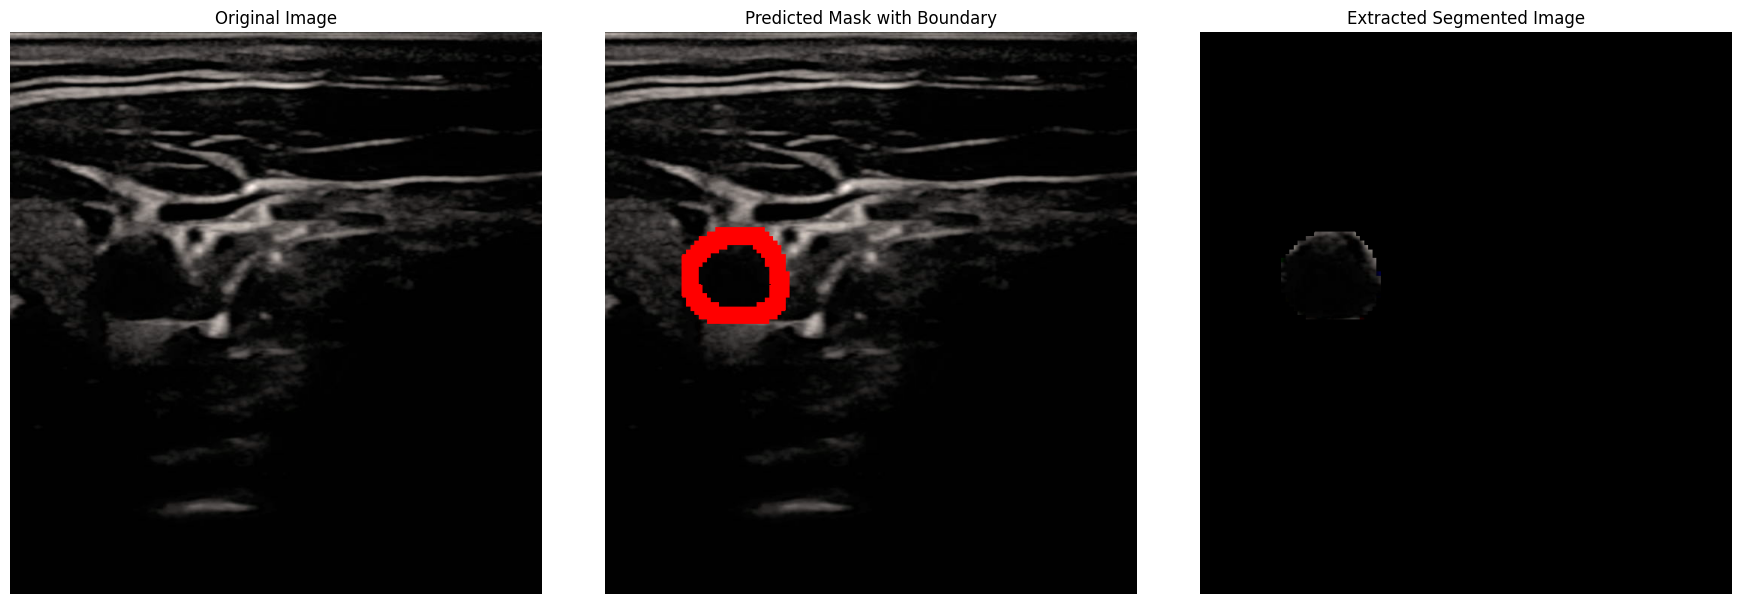

In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

# Load your pre-trained model
model_path = '/content/carotid_artery_model.h5'  # Model path
model = load_model(model_path)

# Step 1: Load and Preprocess New Images for Prediction
def load_and_preprocess_image(img_path, img_size=(128, 128)):
    img = load_img(img_path, target_size=img_size)
    img = img_to_array(img) / 255.0  # Normalize to [0,1]
    return np.expand_dims(img, axis=0)  # Add batch dimension

# Step 2: Predicting on a New Image
new_image_path = '/content/drive/MyDrive/Data/Common_Carotid_Artery_Ultrasound_Images/US_images/202201121748100022VAS_slice_1069.png'  # Image path
new_image = load_and_preprocess_image(new_image_path)

# Step 3: Make Predictions
predicted_mask = model.predict(new_image)

# Step 4: Post-process the Output
predicted_mask = np.squeeze(predicted_mask)  # Remove batch dimension
predicted_mask = (predicted_mask * 255).astype(np.uint8)  # Convert to 0-255 range

# Ensure the predicted_mask is binary (0 or 255)
_, binary_mask = cv2.threshold(predicted_mask, 127, 255, cv2.THRESH_BINARY)

# Step 5: Find the Boundary of the Predicted Mask
def find_mask_boundary(mask):
    if mask.ndim == 3:  # If mask is 3D (e.g., RGB)
        mask = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)  # Convert to grayscale
    _, binary_mask = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
    # Find contours
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Create an empty image for the boundary
    boundary_image = np.zeros_like(mask)
    # Draw contours on the boundary image in red
    cv2.drawContours(boundary_image, contours, -1, (255, 0, 0), thickness=2)  # Red boundary (BGR format)
    return boundary_image

# Get the mask boundary
mask_boundary = find_mask_boundary(predicted_mask)

# Step 6: Overlay the Mask and Boundary on the Original Image
def overlay_mask_and_boundary(original_image_path, predicted_mask, mask_boundary):
    # Load and convert the original image to a NumPy array
    original_image = img_to_array(load_img(original_image_path)) / 255.0  # Normalize to [0, 1]
    # Resize predicted mask and mask boundary to match original image size
    original_height, original_width, _ = original_image.shape
    predicted_mask_resized = cv2.resize(predicted_mask, (original_width, original_height))
    mask_boundary_resized = cv2.resize(mask_boundary, (original_width, original_height))
    # Create an overlay by blending the original image and mask boundary
    overlay = original_image.copy()
    overlay[mask_boundary_resized > 0] = [1, 0, 0]  # Set boundary pixels to red
    return overlay, original_image

# Create the overlay
overlay_image, original_image = overlay_mask_and_boundary(new_image_path, predicted_mask, mask_boundary)

# Step 7: Extract the Image Segment Enclosed by the Mask
def extract_segment(original_image, binary_mask):
    # Resize the binary mask to match the original image dimensions
    original_height, original_width, _ = original_image.shape
    binary_mask_resized = cv2.resize(binary_mask, (original_width, original_height))
    # Create an empty image to hold the segmented region
    segmented_image = np.zeros_like(original_image)
    # Apply the binary mask to the original image
    segmented_image[binary_mask_resized > 0] = original_image[binary_mask_resized > 0]
    return segmented_image

# Extract the image segment that is enclosed by the mask boundary
segmented_image = extract_segment(original_image, binary_mask)

# Step 8: Display the Images
plt.figure(figsize=(18, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(original_image)
plt.axis('off')

# Predicted Mask with Boundary
plt.subplot(1, 3, 2)
plt.title("Predicted Mask with Boundary")
plt.imshow(overlay_image)
plt.axis('off')

# Extracted Segmented Image
plt.subplot(1, 3, 3)
plt.title("Extracted Segmented Image")
plt.imshow(segmented_image)
plt.axis('off')

plt.tight_layout()
plt.show()
